# scikit-learn中的SVM中的高斯核函数以及高斯核函数中的$\gamma$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

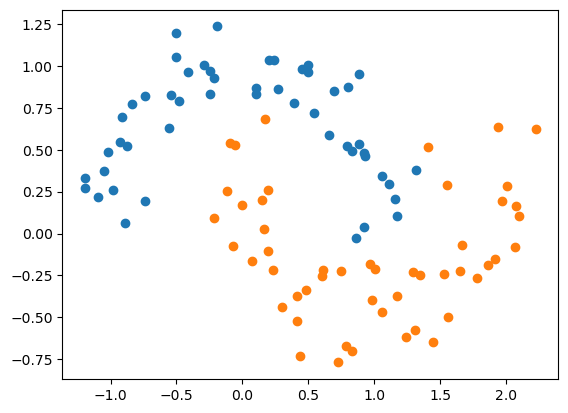

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [4]:
svc = RBFKernelSVC(gamma=1)
svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1))])

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

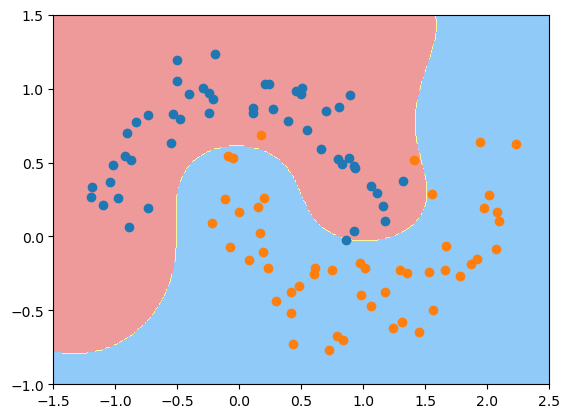

In [6]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [7]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=100))])

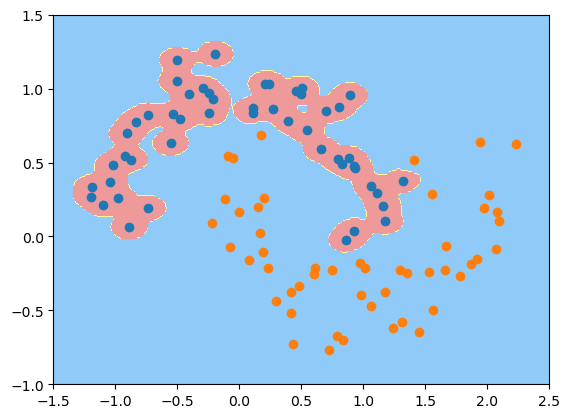

In [8]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

针对其中的某一类，在每一个样本点周围都形成了钟形的图（把正态分布沿着对称轴旋转一下？），这图可以看作是俯视这些钟形图。蓝色点是钟的尖。  
当然这里显然是过拟合了～

In [9]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=10))])

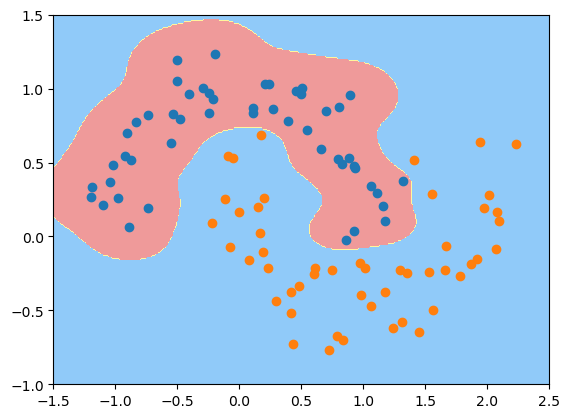

In [10]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

这些钟融合在一起形成了这样的决策边界。蓝色点是钟的尖。  
当然这里显然是过拟合了～

In [11]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.5))])

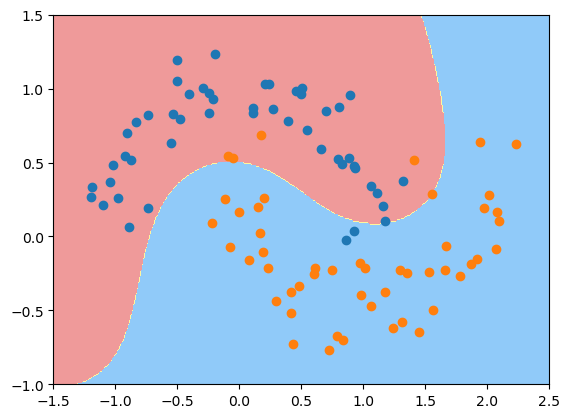

In [12]:
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [13]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.1))])

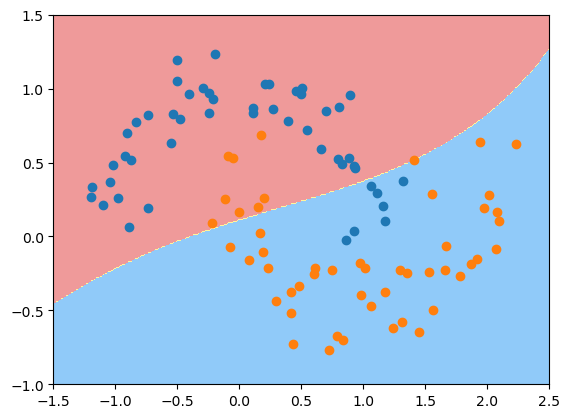

In [14]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

钟太宽了，融在一起形成了这样的决策边界。和线性的决策边界类似，欠拟合。